In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import time
import numpy as np

token = '../../Data/rq1/rq1token.csv'
liq = '../../Data/rq1/rq1liqcsv'

#Pd
df_token = pd.read_csv(token)
df_liqui = pd.read_csv(liq)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# First month unrealized profit

In [213]:
df_tokenn = df_token.copy()
df_tokenn.loc[df_token['label'].isin(['Normal rug', 'Sell rug']), 'label'] = 'rug'
df_tokenn.value_counts('label')
df_slow = df_tokenn[df_tokenn['label'] == 'Undetermined']
df_rug = df_tokenn[df_tokenn['label'] == 'rug']

rug_un = []

for outer_index, outer_row in df_rug.iterrows():
    pool = outer_row['pool_address']
    
    owner = outer_row['token_owner']
    utoken= outer_row['token_address']
    vtokenn = outer_row['token_paired_address']

    df_tokenliq_sub = df_liqui[df_liqui['contract_address'] == pool]
    df_tokenliq_sub.loc[:, 'timestamp'] = pd.to_datetime(df_tokenliq_sub['timestamp'])
    df_tokenliq = df_tokenliq_sub.sort_values(by='timestamp')
    df_tokenliq_all_vtokenn = df_tokenliq[df_tokenliq['token_address'] == vtokenn]

    df_tokenliq_depwith_vtokenn = df_tokenliq_all_vtokenn[df_tokenliq_all_vtokenn['category'].isin(['deposit', 'withdraw'])]
    start_time = df_tokenliq['timestamp'].iloc[0]
    end_time = start_time + pd.DateOffset(months=1)
    df_1monthliq = df_tokenliq_depwith_vtokenn[(df_tokenliq_depwith_vtokenn['timestamp'] >= start_time) & (df_tokenliq_depwith_vtokenn['timestamp'] <= end_time)]
    df_1monthliq_all = df_tokenliq_all_vtokenn[(df_tokenliq_all_vtokenn['timestamp'] >= start_time) & (df_tokenliq_all_vtokenn['timestamp'] <= end_time)]

    owner_share = 1
    alert = 0
    for index, row in df_1monthliq.iterrows():
        if row['pool_balance'] == 0:
            alert = 1
            break
        if row['sender_address'] == owner:
            owner_share = owner_share * ((row['pool_balance'] - row['amount_token'])/ row['pool_balance']) + row['amount_token'] / row['pool_balance']
        else:
            owner_share = owner_share * ((row['pool_balance'] - row['amount_token'])/ row['pool_balance'])
    
    unrealized_profit = df_1monthliq_all['pool_balance'].iloc[-1] * owner_share if alert == 0 else 0 
    investment = df_1monthliq_all['pool_balance'].iloc[0]
    rug_un.append(unrealized_profit/investment)
    

In [223]:
slid_un = []
for outer_index, outer_row in df_slow.iterrows():
    pool = outer_row['pool_address']
    owner = outer_row['token_owner']
    utoken= outer_row['token_address']
    vtokenn = outer_row['token_paired_address']

    df_tokenliq_sub = df_liqui[df_liqui['contract_address'] == pool]
    df_tokenliq_sub.loc[:, 'timestamp'] = pd.to_datetime(df_tokenliq_sub['timestamp'])
    df_tokenliq = df_tokenliq_sub.sort_values(by='timestamp')
    df_tokenliq_all_vtokenn = df_tokenliq[df_tokenliq['token_address'] == vtokenn]

    df_tokenliq_depwith_vtokenn = df_tokenliq_all_vtokenn[df_tokenliq_all_vtokenn['category'].isin(['deposit', 'withdraw'])]
    start_time = df_tokenliq['timestamp'].iloc[0]
    end_time = start_time + pd.DateOffset(months=1)
    df_1monthliq = df_tokenliq_depwith_vtokenn[(df_tokenliq_depwith_vtokenn['timestamp'] >= start_time) & (df_tokenliq_depwith_vtokenn['timestamp'] <= end_time)]
    df_1monthliq_all = df_tokenliq_all_vtokenn[(df_tokenliq_all_vtokenn['timestamp'] >= start_time) & (df_tokenliq_all_vtokenn['timestamp'] <= end_time)]

    owner_share = 1
    alert = 0
    for index, row in df_1monthliq.iterrows():
        if row['pool_balance'] == 0:
            alert = 1
            break
        if row['sender_address'] == owner:
            owner_share = owner_share * ((row['pool_balance'] - row['amount_token'])/ row['pool_balance']) + row['amount_token'] / row['pool_balance']
        else:
            owner_share = owner_share * ((row['pool_balance'] - row['amount_token'])/ row['pool_balance'])
    
    unrealized_profit = df_1monthliq_all['pool_balance'].iloc[-1] * owner_share if alert == 0 else 0 
    investment = df_1monthliq_all['pool_balance'].iloc[0]
    slid_un.append(unrealized_profit/investment)
 

In [94]:
df_slow = df_tokenn[df_tokenn['label'] == 'Undetermined']
df_rug = df_tokenn[df_tokenn['label'] == 'rug']

In [ ]:
amount_rug = []
day_rug = []
order_rug = []
tp_rug = []

for outer_index, outer_row in df_rug.iterrows():
    pool = outer_row['pool_address']
    owner = outer_row['token_owner']
    utoken= outer_row['token_address']
    vtokenn = outer_row['token_paired_address']

    df_tokenliq_sub = df_liq[df_liq['contract_address'] == pool]
    df_tokenliq_sub.loc[:, 'timestamp'] = pd.to_datetime(df_tokenliq_sub['timestamp'])
    df_tokenliq = df_tokenliq_sub.sort_values(by='timestamp')

    df_tokenliq_onwer = df_tokenliq[df_tokenliq['sender_address'] == owner]
    df_tokenliq_onwer_vtokenn = df_tokenliq[df_tokenliq['token_address'] == vtokenn]
    start_time = df_tokenliq['timestamp'].iloc[0]
    end_time = start_time + pd.DateOffset(months=1)
    df_1monthliq = df_tokenliq_onwer_vtokenn[(df_tokenliq_onwer_vtokenn['timestamp'] >= start_time) & (df_tokenliq_onwer_vtokenn['timestamp'] <= end_time)]
    order_rug.append(df_1monthliq.shape[0] - 1)
    df_1monthliq_tp = df_1monthliq[df_1monthliq['category'].isin(['sell', 'withdraw'])]
    tp_rug.append(df_1monthliq_tp.shape[0] - 1)




    df_tokenliq_owner_filtered = df_tokenliq_onwer[df_tokenliq_onwer['amount_token'] > 0.9 * df_tokenliq_onwer['pool_balance']].head(1)

    amount_rug.append(df_tokenliq_owner_filtered['amount_token'].values[0] / df_tokenliq_owner_filtered['pool_balance'].values[0])
    day = (df_tokenliq_owner_filtered['timestamp'].iloc[0] - df_tokenliq['timestamp'].iloc[0]).days
    day_rug.append(day)

In [108]:
order_slow = []
tp_slow = []
amount_slow = []
day_slow = []

slow_tp_min = []
slow_tp_max = []
slow_tp_avg = []

for outer_index, outer_row in df_slow.iterrows():
    pool = outer_row['pool_address']
    owner = outer_row['token_owner']
    utoken= outer_row['token_address']
    vtokenn = outer_row['token_paired_address']

    df_tokenliq_sub = df_liq[df_liq['contract_address'] == pool]
    df_tokenliq_sub.loc[:, 'timestamp'] = pd.to_datetime(df_tokenliq_sub['timestamp'])
    df_tokenliq = df_tokenliq_sub.sort_values(by='timestamp')
    df_tokenliq_onwer = df_tokenliq[df_tokenliq['sender_address'] == owner]
    df_tokenliq_onwer_vtokenn = df_tokenliq[df_tokenliq['token_address'] == vtokenn]

    start_time = df_tokenliq['timestamp'].iloc[0]
    end_time = start_time + pd.DateOffset(days=5)
    df_1monthliq = df_tokenliq_onwer_vtokenn[(df_tokenliq_onwer_vtokenn['timestamp'] >= start_time) & (df_tokenliq_onwer_vtokenn['timestamp'] <= end_time)]
    order_slow.append(df_1monthliq.shape[0] - 1)
    df_1monthliq_tp = df_1monthliq[df_1monthliq['category'].isin(['sell', 'withdraw'])]
    df_1monthliq_tp['per'] = (abs(df_1monthliq_tp['amount_token']) / (df_1monthliq_tp['pool_balance'] - df_1monthliq_tp['amount_token']))*100
    slow_tp_min.append(df_1monthliq_tp['per'].min())
    slow_tp_max.append(df_1monthliq_tp['per'].max())
    slow_tp_avg.append(df_1monthliq_tp['per'].mean())
    tp_slow.append(df_1monthliq_tp.shape[0])

    df_tokenliq_owner_filtered = df_tokenliq_onwer[df_tokenliq_onwer['amount_token'] > 0.9 * df_tokenliq_onwer['pool_balance']].head(1)

    amount_slow.append(df_tokenliq_owner_filtered['amount_token'].values[0] / df_tokenliq_owner_filtered['pool_balance'].values[0])
    day = (df_tokenliq_owner_filtered['timestamp'].iloc[0] - df_tokenliq['timestamp'].iloc[0]).days
    day_slow.append(day)

/var/folders/w4/8xxkl8d50_v3f6_3csmgcv700000gn/T/ipykernel_35029/3030517351.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1monthliq_tp['per'] = (abs(df_1monthliq_tp['amount_token']) / (df_1monthliq_tp['pool_balance'] - df_1monthliq_tp['amount_token']))*100
/var/folders/w4/8xxkl8d50_v3f6_3csmgcv700000gn/T/ipykernel_35029/3030517351.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1monthliq_tp['per'] = (abs(df_1monthliq_tp['amount_token']) / (df_1monthliq_tp['pool_balance'] - df_1monthliq_tp[

In [125]:
print(np.mean(slow_tp_min))
print(np.mean(slow_tp_max))

7.395629198145635
42.92653326533891


In [22]:
rug = []
slow = []

for outer_index, outer_row in df_tokenn.iterrows():
    #Get owner, verified and unverified token of pool
    pool = outer_row['pool_address']
    owner = outer_row['token_owner']
    utoken= outer_row['token_address']
    vtokenn = outer_row['token_paired_address']

    df_tokenliq_sub = df_liq[df_liq['contract_address'] == pool]
    df_tokenliq_sub.loc[:, 'timestamp'] = pd.to_datetime(df_tokenliq_sub['timestamp'])
    df_tokenliq = df_tokenliq_sub.sort_values(by='timestamp')

    start_time = df_tokenliq['timestamp'].iloc[0]
    end_time = start_time + pd.DateOffset(months=1)
    df_1monthliq = df_tokenliq[(df_tokenliq['timestamp'] >= start_time) & (df_tokenliq['timestamp'] <= end_time)]
    df_1monthliq

    first_timestamp = df_tokenliq['timestamp'].iloc[0]
    last_timestamp = df_tokenliq['timestamp'].iloc[-1]
    range = last_timestamp - first_timestamp
    range_days = range.days
    if outer_row['label'] == 'rug':
        rug.append(range_days)
    elif outer_row['label'] == 'Undetermined':
        slow.append(range_days)

In [26]:
count_slow = sum(1 for element in slow if element > 60)
count_rug = sum(1 for element in rug if element > 60)
print(count_slow,len(slow),count_slow/len(slow))
print(count_rug,len(rug),count_rug/len(rug))

38 70 0.5428571428571428
33 665 0.04962406015037594


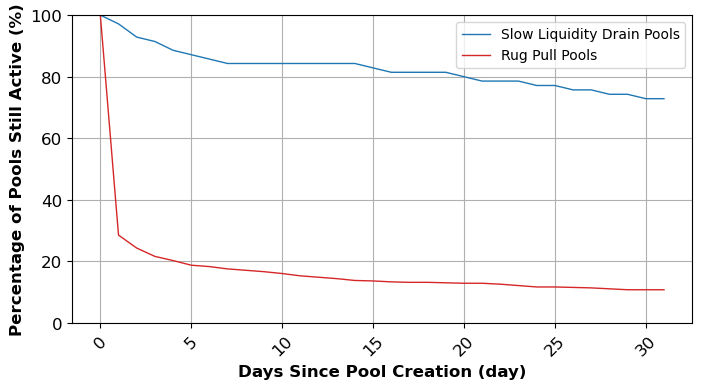

In [68]:
# Sorting the day lists
slow_day_sorted = sorted(slow)
fast_dayy_sorted = sorted(rug)


len_slow = len(slow_day_sorted)
len_fast = len(fast_dayy_sorted)

x_value = np.arange(0, 32)
y_value_slow = [(len([day for day in slow_day_sorted if day >= x]) / len_slow) * 100 for x in x_value]
y_value_fast = [(len([day for day in fast_dayy_sorted if day >= x]) / len_fast) * 100 for x in x_value]


fig, ax1 = plt.subplots(figsize=(8, 4))
ax1.plot(x_value, y_value_slow, color='#1f77b4', linewidth=1, label='Slow Liquidity Drain Pools')
ax1.plot(x_value, y_value_fast, color='#d62728', linewidth=1, label='Rug Pull Pools')


ax1.set_xlabel('Days Since Pool Creation (day)', fontweight='bold')
ax1.set_ylabel('Percentage of Pools Still Active (%)', fontweight='bold')
ax1.grid(True, zorder=1)
ax1.set_ylim(0, 100)
plt.xticks(rotation=45)
lines_1, labels_1 = ax1.get_legend_handles_labels()
ax1.legend(loc='upper right', prop={'size': 10})

# Show the plot
plt.show()

# Graph for rq1 comparison (since the 2 token is confirmed fraudulent so no anonymize applied)

       id  created_block          token_created_time           pool_created_time                                pool_address exchange_name contract_version                        token_paired_address  verified_decimals                               token_address   name unverified_symbol                                 token_owner                  created_at  test_by_layer  test_by_old  is_honeypot  owner_profit         label  liquidity_get  buy_count  sell_count  withdraw_count  deposit_count  owner_investmen  return_realizeds  realized_profits  unrealized_profits  total_profits  realized_profit_on_investments  total_profit_on_investments  lifetime  distinct_user  max_gain  unrealized_profit_on_investments  return_realizeds_1stmonth
129  1113       19790887  2024-05-03 16:49:59.000000  2024-05-03 16:49:59.000000  0xB6BF6dC27Bb07cCf3F94a1C91EA042dc1C50DD3A       uniswap               v2  0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2                 18  0x28218B8e8637baf43e0F08172fD00d60d9a

/var/folders/w4/8xxkl8d50_v3f6_3csmgcv700000gn/T/ipykernel_35029/3127542956.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_liq.sort_values('timestamp', inplace=True)
/var/folders/w4/8xxkl8d50_v3f6_3csmgcv700000gn/T/ipykernel_35029/3127542956.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_liq['price'] = np.nan
/var/folders/w4/8xxkl8d50_v3f6_3csmgcv700000gn/T/ipykernel_35029/3127542956.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

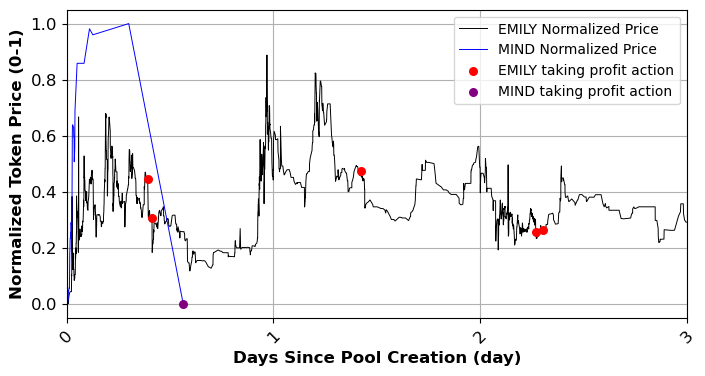

In [207]:
#Token 1

df_slow = df_token[df_token['pool_address'] == '0xB6B...0DD3A']
print(df_slow)
contract = df_slow['pool_address'].values[0]
token = df_slow['token_address'].values[0]
paired = df_slow['token_paired_address'].values[0]
owner = df_slow['token_owner'].values[0]
df_liq = df_liqui[df_liqui['contract_address'] == contract]
df_liq.sort_values('timestamp', inplace=True)
mask = (df_liq['token_address'] == token) & (df_liq['token_price'] != 0)
df_liq['price'] = np.nan
df_liq.loc[df_liq['token_address'] == token, 'price'] = df_liq['token_price']
df_liq['valid_price'] = np.where(mask, df_liq['token_price'], np.nan)
df_liq['valid_price'] = df_liq['valid_price'].fillna(method='ffill')
df_liq.loc[df_liq['token_address'] != token, 'price'] = df_liq['valid_price']
df_liq.drop(columns=['valid_price'], inplace=True)
df_liq['price'] = df_liq['price'].replace(0, np.nan).fillna(method='ffill')
df_liq['price'].fillna(0, inplace=True)
df = df_liq[df_liq['token_address'] == paired]
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df['token_price'] = pd.to_numeric(df['token_price'], errors='coerce')
df = df.dropna(subset=['timestamp', 'token_price'])
df['date'] = df['timestamp'].dt.date
initial_price1 = df['price'].iloc[0]
max_price1 = df['price'].max()
df['normalized_price'] = (df['price'] - initial_price1) / (max_price1 - initial_price1)
df['days_from_start'] = (df['timestamp'] - df['timestamp'].min()).dt.total_seconds() / (60 * 60 * 24)  # Convert seconds to days
filtered_df = df[(df['sender_address'] == owner)]
filtered_df['category'] = filtered_df['category'].replace(['sell', 'withdraw'], 'tp1')
start_time1 = filtered_df['timestamp'].iloc[0]
end_time1 = start_time + pd.DateOffset(months=1)
categories = filtered_df['category'].unique()




df_rug = df_token[df_token['pool_address'] == '0xF48...2C941']
print(df_rug)
contract2 = df_rug['pool_address'].values[0]
token2 = df_rug['token_address'].values[0]
paired2 = df_rug['token_paired_address'].values[0]
owner2 = df_rug['token_owner'].values[0]
df_liq2 = df_liqui[df_liqui['contract_address'] == contract2]
df_liq2.sort_values('timestamp', inplace=True)
mask2 = (df_liq2['token_address'] == token2) & (df_liq2['token_price'] != 0)
df_liq2['price'] = np.nan
df_liq2.loc[df_liq2['token_address'] == token2, 'price'] = df_liq2['token_price']
df_liq2['valid_price'] = np.where(mask2, df_liq2['token_price'], np.nan)
df_liq2['valid_price'] = df_liq2['valid_price'].fillna(method='ffill')
df_liq2.loc[df_liq2['token_address'] != token2, 'price'] = df_liq2['valid_price']
df_liq2.drop(columns=['valid_price'], inplace=True)
df_liq2['price'] = df_liq2['price'].replace(0, np.nan).fillna(method='ffill')
df_liq2['price'].fillna(0, inplace=True)
df2 = df_liq2[df_liq2['token_address'] == paired2]
df2['timestamp'] = pd.to_datetime(df2['timestamp'])
df2['timestamp'] = pd.to_datetime(df2['timestamp'], errors='coerce')
df2['token_price'] = pd.to_numeric(df2['token_price'], errors='coerce')
df2 = df2.dropna(subset=['timestamp', 'token_price'])
df2['date'] = df2['timestamp'].dt.date
df2['days_from_start'] = (df2['timestamp'] - df2['timestamp'].min()).dt.total_seconds() / (60 * 60 * 24)  # Convert seconds to days
initial_price2 = df2['price'].iloc[0]
max_price2 = df2['price'].max()
df2['normalized_price'] = (df2['price'] - initial_price2) / (max_price2 - initial_price2)
filtered_df2 = df2[(df2['sender_address'] == owner2)]
filtered_df2['category'] = filtered_df2['category'].replace(['sell', 'withdraw'], 'tp2')
start_time2 = filtered_df2['timestamp'].iloc[0]
end_time2 = start_time + pd.DateOffset(months=1)
categories2 = filtered_df2['category'].unique()




# Define specific colors for each category
category_colors = {
    'tp1': 'red'
}

category_colors2 = {
    'tp2': 'purple'
}

# Plot the token price as a line plot
fig, ax1 = plt.subplots(figsize=(8, 4))
# Plot the token price

ax1.plot(df['days_from_start'], df['normalized_price'], color='black', linewidth=0.7, label='EMILY Normalized Price')
ax1.plot(df2['days_from_start'], df2['normalized_price'], color='blue', linewidth=0.7, label='MIND Normalized Price')


# Scatter plot for filtered activities with specific colors
for category in categories:
    if category in category_colors:  # Ensure the category has a specified color
        color = category_colors[category]
        category_df = filtered_df[filtered_df['category'] == category]
        ax1.scatter(category_df['days_from_start'], category_df['normalized_price'], 
                    color=color, label=category, alpha=1, s=30, zorder=3)  # Increase point size and opacity

for category in categories2:
    if category in category_colors2:  # Ensure the category has a specified color
        color = category_colors2[category]
        category_df = filtered_df2[filtered_df2['category'] == category]
        ax1.scatter(category_df['days_from_start'], category_df['normalized_price'], 
                    color=color, label=category, alpha=1, s=30, zorder=3)  # Increase point size and opacity

# Customize the primary y-axis (Token Price)
ax1.set_xlabel('Days Since Pool Creation (day)', fontweight='bold')
ax1.set_ylabel('Normalized Token Price (0-1)', fontweight='bold')
ax1.set_xticks([0, 1, 2, 3])


ax1.grid(True, zorder=1)

# Set the x-axis limits to only show up to 2022
ax1.set_xlim(0,3)
# ax1.set_xlim([pd.to_datetime('2021-08-01'), pd.to_datetime('2024-10-25')])
# ax1.set_ylim(0, 1.4e-9)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

lines_1, labels_1 = ax1.get_legend_handles_labels()
labels_1 = ["EMILY taking profit action" if label == 'tp1' else label for label in labels_1]
labels_1 = ["MIND taking profit action" if label == 'tp2' else label for label in labels_1]
ax1.legend(lines_1, labels_1, loc='upper right',prop={'size': 10})

plt.show()